# Створення KNN – класифікатора у Python

### Імпорт необхідних бібліотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Завантаження набору даних Iris


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

### Перемішування записів

In [3]:
np.random.seed(65)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

### Нормалізація

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Розділення на навчальну і тестову вибірки


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Навчання з різними значеннями K

In [6]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

### Візуалізація точності залежно від K

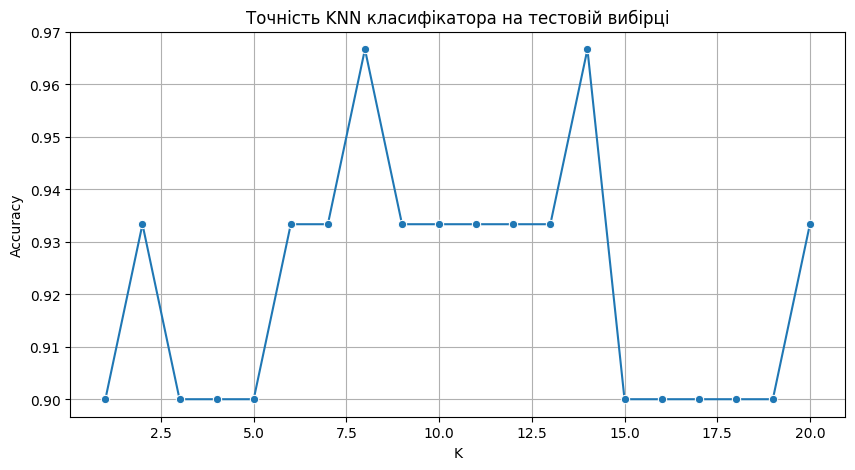

In [7]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("Точність KNN класифікатора на тестовій вибірці")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

### Найкраще значення K

In [8]:
best_k_class = k_values[np.argmax(accuracies)]
print(f"Найкраще значення K для класифікації: {best_k_class}, точність: {max(accuracies):.2f}")

Найкраще значення K для класифікації: 8, точність: 0.97


# Створення KNN – регресора у Python

### Імпорт необхідних бібліотек

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Генерація випадкових даних

In [10]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(1000, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

### Нормалізація


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Розділення на навчальну і тестову вибірки

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Навчання регресора з різними значеннями K


In [13]:
k_values = range(1, 21)
mse_list = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

### Візуалізація MSE залежно від K

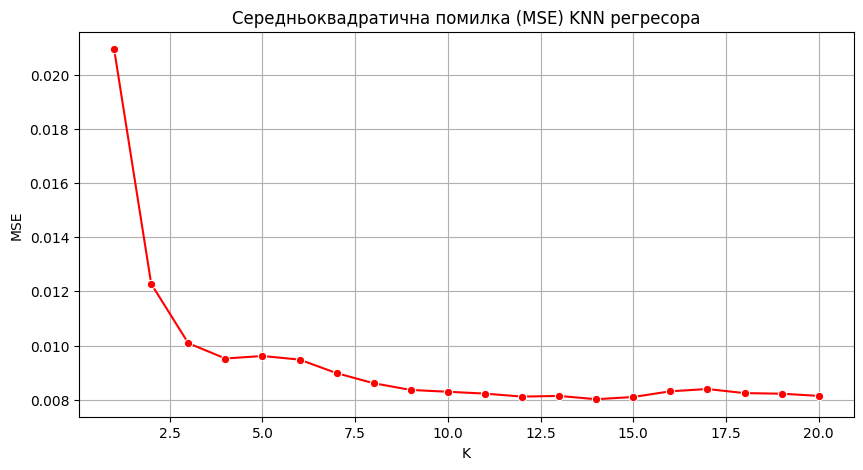

In [14]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=k_values, y=mse_list, marker='o', color='red')
plt.title("Середньоквадратична помилка (MSE) KNN регресора")
plt.xlabel("K")
plt.ylabel("MSE")
plt.grid()
plt.show()

### Найкраще значення K

In [15]:
best_k_reg = k_values[np.argmin(mse_list)]
print(f"Найкраще значення K для регресії: {best_k_reg}, MSE: {min(mse_list):.4f}")

Найкраще значення K для регресії: 14, MSE: 0.0080


# Побудова графіку регресійної кривої для найкращого K

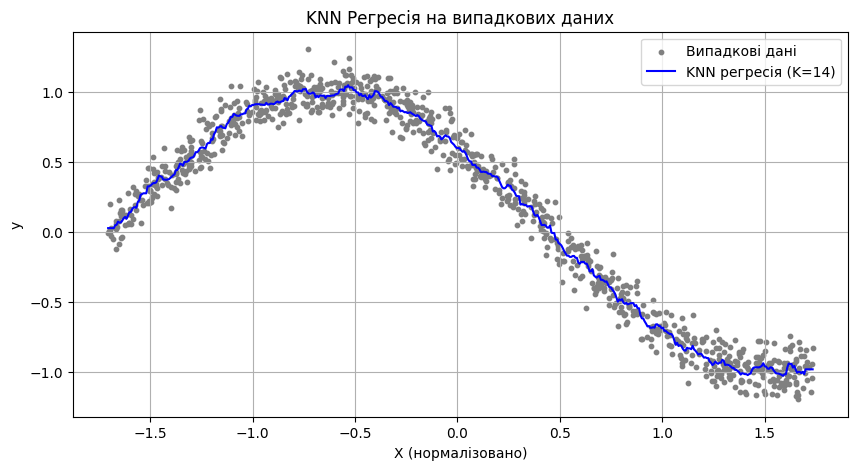

In [16]:
knn_reg_best = KNeighborsRegressor(n_neighbors=best_k_reg)
knn_reg_best.fit(X_train, y_train)

X_plot = np.linspace(X_scaled.min(), X_scaled.max(), 500).reshape(-1, 1)
y_plot = knn_reg_best.predict(X_plot)

plt.figure(figsize=(10, 5))
plt.scatter(X_scaled, y, s=10, color='gray', label="Випадкові дані")
plt.plot(X_plot, y_plot, color='blue', label=f"KNN регресія (K={best_k_reg})")
plt.title("KNN Регресія на випадкових даних")
plt.xlabel("X (нормалізовано)")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()